# Barcode Decoder Project - Model Testing Notebook

* This notebook tests the trained YOLOv8 barcode detection model on new images. It detects barcodes, crops them, and decodes the embedded information using the Pyzbar library.

 ### Step 1 - Mount Google Drive

###### Mounting Google Drive allows access to:

* The trained model weights (best.pt)

* Any additional input images for testing.

In [5]:
# 1) Mounting the Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 ### Step 2 - Install Required Dependencies

##### We install the following

* ultralytics: for YOLOv8 model operations.

* pyzbar: to decode barcodes from cropped images.

* opencv-python-headless: to handle image processing.

* libzbar0: native barcode reader dependency for pyzbar.

In [6]:
# 2) Install required dependencies

!pip install ultralytics pyzbar opencv-python-headless

!apt-get update
!apt-get install -y libzbar0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

### Step 3 - Import Libraries

##### All essential libraries for:

* Object detection (YOLO)

* Image decoding (pyzbar)

* Image display (cv2_imshow)

* File handling (os, glob)

In [7]:
# 3) Imports the necessary libraries

from ultralytics import YOLO
from pyzbar.pyzbar import decode
import cv2, glob
import os
from google.colab.patches import cv2_imshow

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### Step 4 - Load the Trained Model

* Load the best-trained YOLOv8 model saved during training phase.
This model will be used to detect barcodes in unseen test images.

In [10]:
# 4) Loading the best-performing weights (best.pt model)

model_path = '/content/drive/MyDrive/Barcode_Decoder_Project_Final/new_dataset/runs/detect/train/weights/best.pt'
model = YOLO(model_path)

### Step 5 - Upload Images for Testing

* This allows manual upload of multiple images (from your local computer).
All uploaded images are stored in the image_paths list for later processing.

In [13]:
# 5) Upload multiple images from the local system (ref test folder-->images in new_dataset)

from google.colab import files
uploaded = files.upload()             # Here can select multiple files here!

# Get all uploaded filenames
image_paths = []
for img_name in uploaded.keys():
    img_path = f"/content/{img_name}"
    image_paths.append(img_path)

Saving EAN13_09_0037_jpg.rf.a8be6511380ef8d6efff2617ba73b8f2.jpg to EAN13_09_0037_jpg.rf.a8be6511380ef8d6efff2617ba73b8f2.jpg
Saving EAN13_09_0045_jpg.rf.18fc992678eedc8d2b3b724b77345af0.jpg to EAN13_09_0045_jpg.rf.18fc992678eedc8d2b3b724b77345af0.jpg


### Step 6 - Detect, Crop, and Decode Barcodes

* Prediction: YOLOv8 detects barcode regions in the image.

* Bounding Boxes: Detected boxes are looped over.

* Cropping: Each box is cropped with padding for better accuracy.

* Grayscale Conversion: Barcodes are decoded better in grayscale.

* Decoding: pyzbar.decode() is used to extract barcode data.

* Output: If a barcode is decoded, its type and data are printed.


--- EAN13_09_0037_jpg.rf.a8be6511380ef8d6efff2617ba73b8f2.jpg ---

image 1/1 /content/EAN13_09_0037_jpg.rf.a8be6511380ef8d6efff2617ba73b8f2.jpg: 640x640 1 barcode, 609.6ms
Speed: 7.5ms preprocess, 609.6ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


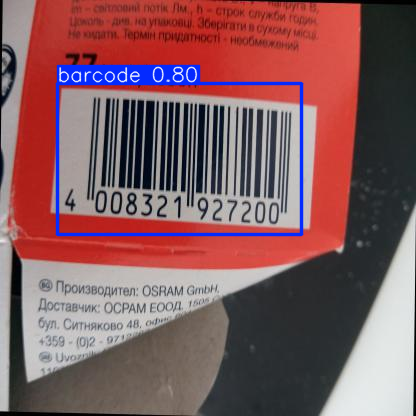

Barcode Data: 4008321927200
Type: EAN13

--- EAN13_09_0045_jpg.rf.18fc992678eedc8d2b3b724b77345af0.jpg ---

image 1/1 /content/EAN13_09_0045_jpg.rf.18fc992678eedc8d2b3b724b77345af0.jpg: 640x640 1 barcode, 619.5ms
Speed: 6.4ms preprocess, 619.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


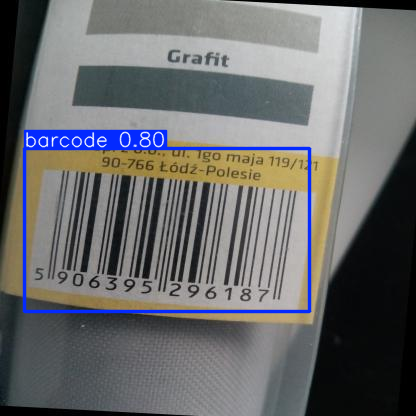

Barcode Data: 5906395296187
Type: EAN13


In [16]:
for img_path in image_paths:
    print(f"\n--- {os.path.basename(img_path)} ---")

    # Detecting the Barcode
    results = model.predict(source=img_path, imgsz=640, conf=0.25, save=False)
    res = results[0]
    img = res.orig_img.copy()

    # Show annotated image
    annotated = res.plot()
    cv2_imshow(annotated)

    # Decoding all the detected boxes
    decoded_any = False
    for box in res.boxes.xyxy.cpu().numpy():
        x1, y1, x2, y2 = map(int, box)
        pad = 10
        h, w = img.shape[:2]
        x1m, y1m = max(0, x1-pad), max(0, y1-pad)
        x2m, y2m = min(w, x2+pad), min(h, y2+pad)
        crop = img[y1m:y2m, x1m:x2m]

        # Grayscale before decode
        gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
        decoded_objs = decode(gray)

        if decoded_objs:
            decoded_any = True
            for obj in decoded_objs:
                data = obj.data.decode("utf-8")
                print("Barcode Data:", obj.data.decode("utf-8"))
                print("Type:", obj.type)

    if not decoded_any:
        print("→ No barcode detected")
